In [6]:
%matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split


boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
y = boston.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
print X_train.shape, y_train.shape
#print X_test.shape, y_test.shape

(303, 13) (303,)


In [15]:
lm = linear_model.LinearRegression()

In [16]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model = lm.fit(X_train, y_train)

In [18]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
predictions = lm.predict(X_test)

Score: 0.705549470696


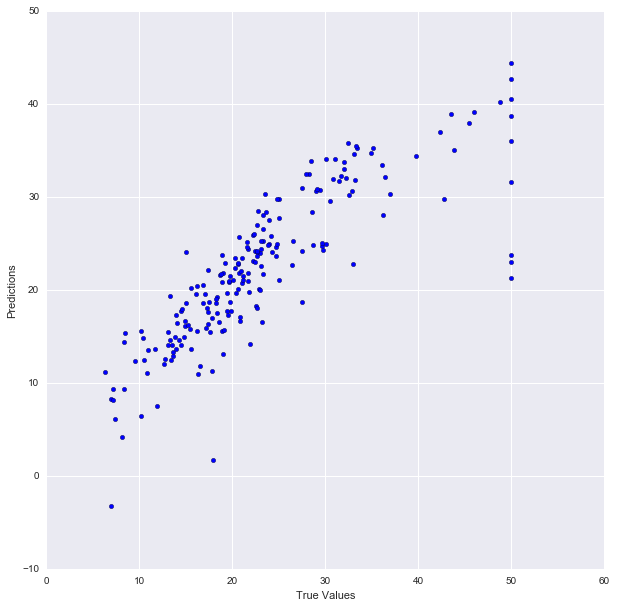

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)  


In [26]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [28]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


In [29]:
predictions.shape

(203,)

In [30]:
#50/50 split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
print X_train.shape, y_train.shape

(253, 13) (253,)


Score: 0.738818882875


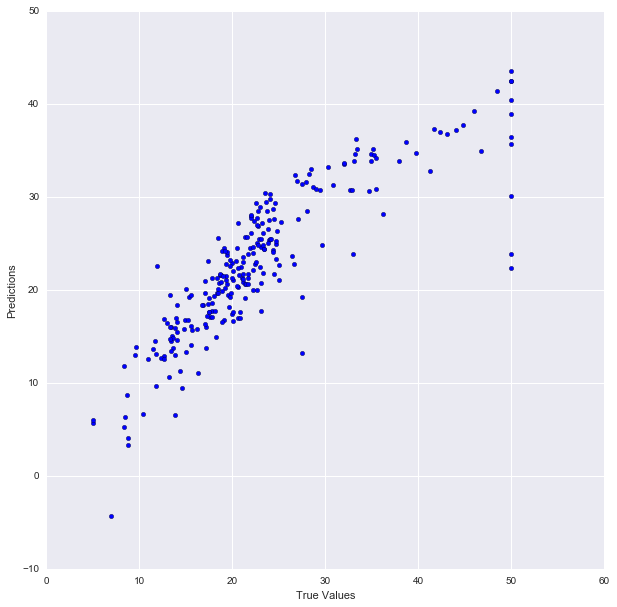

In [31]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)     

In [32]:
#70/30 split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.7)
print X_train.shape, y_train.shape

(151, 13) (151,)


Score: 0.706649530798


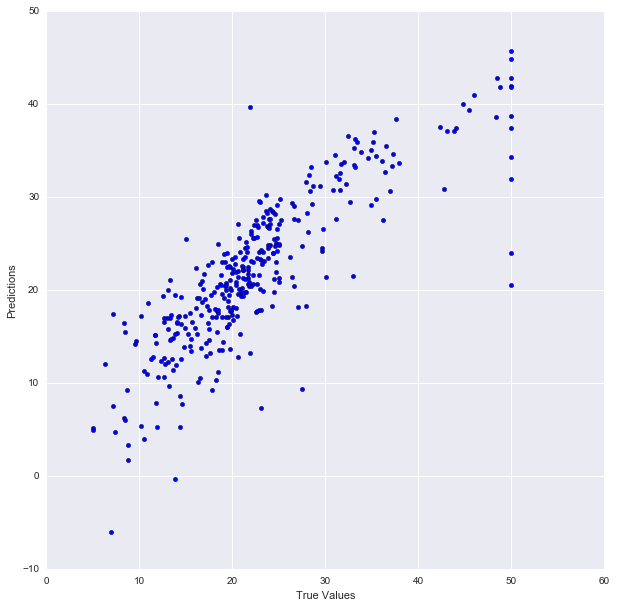

In [33]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)     

In [35]:
#90/10 split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.9)
print X_train.shape, y_train.shape

(50, 13) (50,)


Score: 0.492158376155


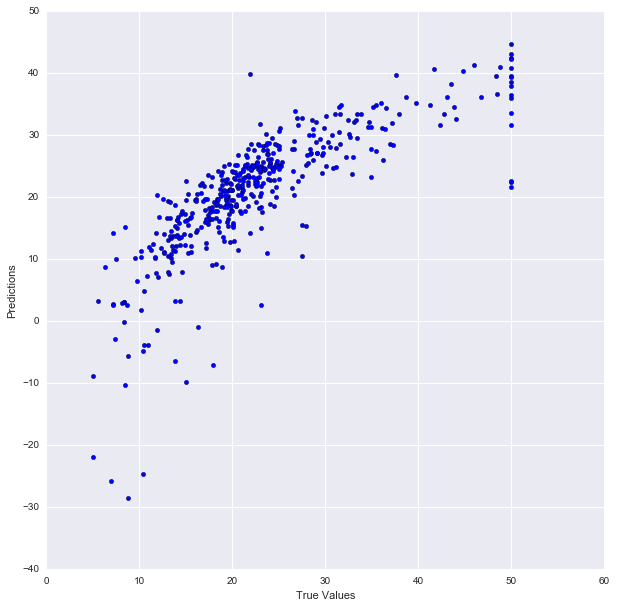

In [36]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)   

In [39]:
#Beginning of Lab work, afternoon 10/12
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [42]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [67]:
xs = df[['TAX','CRIM', 'CHAS']]
xs.head()

,TAX,CRIM,CHAS
0,296.0,0.00632,0.0
1,242.0,0.02731,0.0
2,242.0,0.02729,0.0
3,222.0,0.03237,0.0
4,222.0,0.06905,0.0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)


In [69]:
lm = linear_model.LinearRegression()

In [70]:
model_1 = lm.fit(X_train, y_train)

In [71]:
model_1.score(X_test, y_test)

0.22199284810934994

In [72]:
xs = df[['TAX','CRIM', 'CHAS', 'DIS', 'AGE']]
xs.head()

,TAX,CRIM,CHAS,DIS,AGE
0,296.0,0.00632,0.0,4.0900,65.2
1,242.0,0.02731,0.0,4.9671,78.9
2,242.0,0.02729,0.0,4.9671,61.1
3,222.0,0.03237,0.0,6.0622,45.8
4,222.0,0.06905,0.0,6.0622,54.2


In [73]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

In [74]:
model_2 = lm.fit(X_train, y_train)

In [75]:
model_2.score(X_test, y_test)

0.30240394722591646

In [64]:
model_2.coef_

array([  1.72155344e-15,  -7.77156117e-16,   1.32597926e-15,
         4.43395320e-15,   1.00000000e+00])

In [76]:
y
y = boston.target

In [77]:
xs = df[['CHAS', 'DIS', 'AGE']]
xs.head()

,CHAS,DIS,AGE
0,0.0,4.0900,65.2
1,0.0,4.9671,78.9
2,0.0,4.9671,61.1
3,0.0,6.0622,45.8
4,0.0,6.0622,54.2


In [78]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

In [79]:
model_3 = lm.fit(X_train, y_train)

In [80]:
model_3.score(X_test, y_test)

0.19459302245383947

In [88]:
xs = df[['TAX', 'CRIM', 'RAD', 'DIS', 'INDUS']]
xs.head()

,TAX,CRIM,RAD,DIS,INDUS
0,296.0,0.00632,1.0,4.0900,2.31
1,242.0,0.02731,2.0,4.9671,7.07
2,242.0,0.02729,2.0,4.9671,7.07
3,222.0,0.03237,3.0,6.0622,2.18
4,222.0,0.06905,3.0,6.0622,2.18


In [89]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

In [90]:
model_4 = lm.fit(X_train, y_train)

In [91]:
model_4.score(X_test, y_test)

0.2377977784189742

In [92]:
xs = df[['RAD', 'DIS', 'INDUS']]
xs.head()

,RAD,DIS,INDUS
0,1.0,4.0900,2.31
1,2.0,4.9671,7.07
2,2.0,4.9671,7.07
3,3.0,6.0622,2.18
4,3.0,6.0622,2.18


In [93]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

In [94]:
model_5 = lm.fit(X_train, y_train)

In [95]:
model_5.score(X_test, y_test)

0.33078200319558371